In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.optimize import curve_fit

In [ ]:
def cargar_datos(file_name : str, pow_measure = False) -> list:

    # Cargamos los datos
    with open(file_name, "rb") as f:
        dic = pickle.load(f)
    # Hago una lista con los valores de offset que alimentamos con el generador de funciones
    offs_values_keys = list(dic.keys())
    # Valores de corriente en mA
    corr_values = [np.mean(dic[offset]["V_2"])*1000 for offset in offs_values_keys]
    # Verdaderos valores de continua
    offs_true_values = [np.mean(dic[offset]["V_1"]) for offset in offs_values_keys]
    # Le sacamos la "V" a las keys
    offs_values = [float(offset[:-1]) for offset in offs_values_keys]

    # Creamos una lista para guardar todos los datos que nos interesan
    lista_mediciones = [offs_values, offs_true_values, corr_values]

    # Mediciones de la potencia
    if pow_measure:
        POW_values = [np.mean(dic[offset]["POW"])*1000 for offset in offs_values_keys] # Potencia en mW
        POW_var_values = [np.std(dic[offset]["POW"])*1000 for offset in offs_values_keys] # Potencia en mW

        lista_mediciones.append(POW_values)
        lista_mediciones.append(POW_var_values)

    return lista_mediciones

Cosas a estudiar

In [2]:
# Valor medio de respuesta vs. amplitud de alimentacion
# Valor medio de respuesta vs. offset de alimentacion
# Amplitud de respuesta vs. amplitud de alimentacion
# Amplitud de respuesta vs. offset de alimentacion
# frecuencia de respuesta vs. frecuencia de alimentacion

In [2]:
# Cargamos los datos
with open(f"../mediciones/Barrido para potencia completa 2104.pickle", "rb") as f:
    dic = pickle.load(f)

In [3]:
# Hago una lista con los valores de offset que alimentamos con el generador de funciones
offs_values = list(dic.keys())
print(offs_values)
# Valores de corriente en mA
corr_values = [np.mean(dic[offset]["V_2"])*1000 for offset in offs_values]
print(corr_values)

['-0.5V', '-0.5918367346938771V', '-0.6836734693877551V', '-0.7755102040816322V', '-0.8673469387755102V', '-0.9591836734693873V', '-1.0510204081632653V', '-1.1428571428571428V', '-1.2346938775510203V', '-1.3265306122448979V', '-1.4183673469387754V', '-1.510204081632653V', '-1.6020408163265305V', '-1.693877551020408V', '-1.7857142857142856V', '-1.8775510204081631V', '-1.9693877551020407V', '-2.061224489795918V', '-2.1530612244897958V', '-2.2448979591836733V', '-2.336734693877551V', '-2.4285714285714284V', '-2.520408163265306V', '-2.6122448979591835V', '-2.704081632653061V', '-2.7959183673469385V', '-2.887755102040816V', '-2.9795918367346936V', '-3.071428571428571V', '-3.163265306122449V', '-3.2551020408163263V', '-3.3469387755102042V', '-3.4387755102040813V', '-3.5306122448979593V', '-3.6224489795918364V', '-3.7142857142857144V', '-3.8061224489795915V', '-3.8979591836734695V', '-3.9897959183673466V', '-4.081632653061225V', '-4.173469387755102V', '-4.26530612244898V', '-4.357142857142857

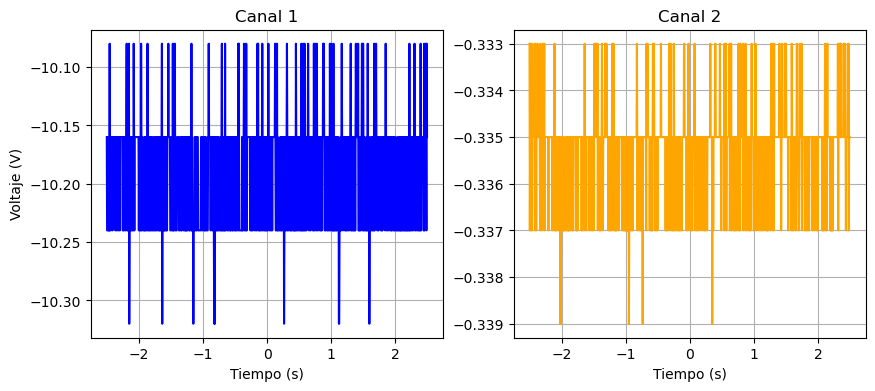

In [65]:
volt = offs_values[-1]

t_1, v_1 = dic[volt]["t_1"], dic[volt]["V_1"]
t_2, v_2 = dic[volt]["t_2"], dic[volt]["V_2"]


fig, axs = plt.subplots(ncols = 2, figsize = (10,4))
axs[0].plot(t_1,v_1, color = "b")
axs[0].set_xlabel("Tiempo (s)")
axs[1].plot(t_2,v_2, color = "orange")
axs[1].set_xlabel("Tiempo (s)")
axs[0].set_ylabel("Voltaje (V)")
axs[0].set_title("Canal 1")
axs[0].grid()
axs[1].set_title("Canal 2")
axs[1].grid()
plt.show()

# Relación entre offset seteado y offset medido

In [54]:
offs_true_values = [np.mean(dic[offset]["V_1"]) for offset in offs_values]

offs_values_new = []
for offset in offs_values:
    new_offset = offset[:-1]
    offs_values_new.append(float(new_offset))

print("Valores del generador",offs_values_new)
#print("Valores Viejos", offs_values)
print("Valores medidos", offs_true_values)

Valores del generador [-0.5, -0.5918367346938771, -0.6836734693877551, -0.7755102040816322, -0.8673469387755102, -0.9591836734693873, -1.0510204081632653, -1.1428571428571428, -1.2346938775510203, -1.3265306122448979, -1.4183673469387754, -1.510204081632653, -1.6020408163265305, -1.693877551020408, -1.7857142857142856, -1.8775510204081631, -1.9693877551020407, -2.061224489795918, -2.1530612244897958, -2.2448979591836733, -2.336734693877551, -2.4285714285714284, -2.520408163265306, -2.6122448979591835, -2.704081632653061, -2.7959183673469385, -2.887755102040816, -2.9795918367346936, -3.071428571428571, -3.163265306122449, -3.2551020408163263, -3.3469387755102042, -3.4387755102040813, -3.5306122448979593, -3.6224489795918364, -3.7142857142857144, -3.8061224489795915, -3.8979591836734695, -3.9897959183673466, -4.081632653061225, -4.173469387755102, -4.26530612244898, -4.357142857142857, -4.448979591836735, -4.540816326530612, -4.63265306122449, -4.724489795918367, -4.816326530612245, -4.9

In [55]:
def lineal(x, a, b): return a*x+b

# Utilizo curve_fit() para el ajuste
popt, pcov = curve_fit(lineal, offs_values_new, offs_true_values)

# Imprimo en pantalla los valores de popt y pcov
a, b = popt
err_a, err_b = np.sqrt(np.diag(pcov))
print("Los parametros de ajuste son:")
print(f'a: {a} ± {err_a}')
print(f'b: {b} ± {err_b}')

Los parametros de ajuste son:
a: 2.0085899709917534 ± 0.0013502452302580645
b: -0.13058557993381095 ± 0.0041218721881863835


Hay diferencias recién en la 3ra y 4ta cifra significativa.

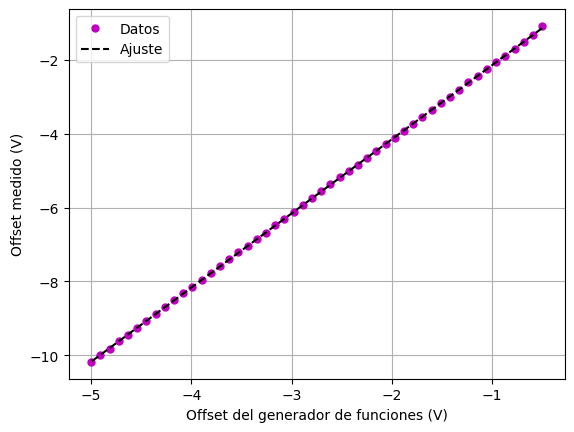

In [56]:
plt.plot(offs_values_new, offs_true_values, ".m",ms = 10, label = "Datos")
plt.plot(offs_values_new, lineal(np.array(offs_values_new),a,b), "--k", label = "Ajuste")
plt.xlabel("Offset del generador de funciones (V)")
plt.ylabel("Offset medido (V)")
plt.legend()
plt.grid()
plt.show()

# Relación entre offset de la alimentación y valor medio de corriente medido

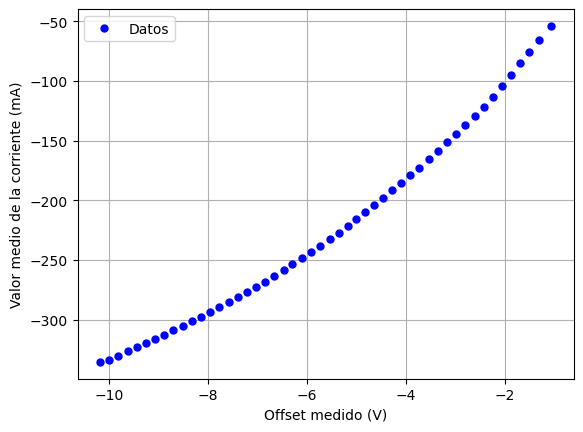

In [57]:
plt.plot(offs_true_values[:], corr_values[:],".b", ms = 10, label = "Datos")
#plt.plot(offs_true_values[:], corr_values[:],".b", ms = 10, label = "Datos")
plt.ylabel("Valor medio de la corriente (mA)")
plt.xlabel("Offset medido (V)")
plt.legend()
plt.grid()
plt.show()

In [58]:
# Ajuste cuadrático
def cuad(x, A, B, C): return A*x**2 + B*x + C

# Utilizo curve_fit() para el ajuste
popt, pcov = curve_fit(cuad, offs_true_values[:], corr_values[:])

# Imprimo en pantalla los valores de popt y pcov
A, B, C = popt
err_A, err_B, err_C = np.sqrt(np.diag(pcov))
print("Los parametros de ajuste son:")
print(f'A: {A} ± {err_A}')
print(f'B: {B} ± {err_B}')
print(f'C: {C} ± {err_C}')

cuadratica = cuad(np.array(offs_true_values[:]),A,B,C)

Los parametros de ajuste son:
A: 1.9127334242016762 ± 0.03928124621968478
B: 51.709676237786994 ± 0.45411574814263733
C: -4.674014356616895 ± 1.1406455703457696


In [59]:
# Ajuste exponencial
def exp(x, Amp, frec, ord): return Amp*np.exp(frec*x) + ord

# Utilizo curve_fit() para el ajuste
popt, pcov = curve_fit(exp, offs_true_values[:], corr_values[:], )

# Imprimo en pantalla los valores de popt y pcov
A, B, C = popt
err_A, err_B, err_C = np.sqrt(np.diag(pcov))
print("Los parametros de ajuste son:")
print(f'A: {A} ± {err_A}')
print(f'B: {B} ± {err_B}')
print(f'C: {C} ± {err_C}')


exponencial = exp(np.array(offs_true_values[:]),A,B,C)

Los parametros de ajuste son:
A: 48.12677416158951 ± inf
B: 46.63406965115863 ± inf
C: -222.34715998047358 ± inf


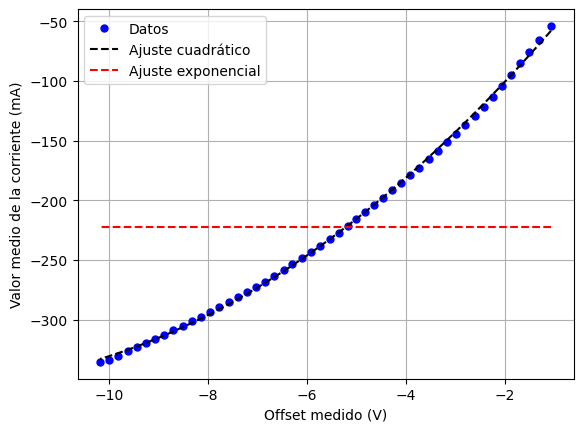

In [60]:
plt.plot(offs_true_values[:], corr_values[:],".b", ms = 10, label = "Datos")
plt.plot(offs_true_values[:], cuadratica, "--k", label = "Ajuste cuadrático")
plt.plot(offs_true_values[:], exponencial, "--r", label = "Ajuste exponencial")
plt.ylabel("Valor medio de la corriente (mA)")
plt.xlabel("Offset medido (V)")
plt.legend()
plt.grid()
plt.show()

## Para obtener los valores de corriente para hacer un barrido y que quede lineal

[-4.358726266947855, -4.224941846463169, -4.096544676259317, -3.973117629944806, -3.8542902270410813, -3.739731927179874, -3.629146587641043, -3.5222678501469002, -3.4188552760025703, -3.3186910884740475, -3.221577411394131, -3.1273339159641615, -3.035795805417409, -2.946812080954947, -2.860244043123063, -2.7759639912839056, -2.693854090565308, -2.6138053810572632, -2.535716908349145, -2.459494958000934, -2.3850523793869702, -2.3123079866767267, -2.241186026627814, -2.171615704443658, -2.103530760255938, -2.0368690898808497, -1.9715724044087788, -1.9075859239512818, -1.8448581015132666, -1.7833403735028963, -1.7229869338538404, -1.6637545291279303, -1.6056022723023313, -1.5484914732331827, -1.4923854840350261, -1.4372495578284743, -1.3830507194927026, -1.329757647218866, -1.2773405637990995, -1.2257711367063684, -1.175022386125673, -1.1250686001892076, -1.075885256748751, -1.027448951089468, -0.9797373290517251, -0.9327290250825319, -0.886403604786925, -0.840741511592631, -0.7957240171

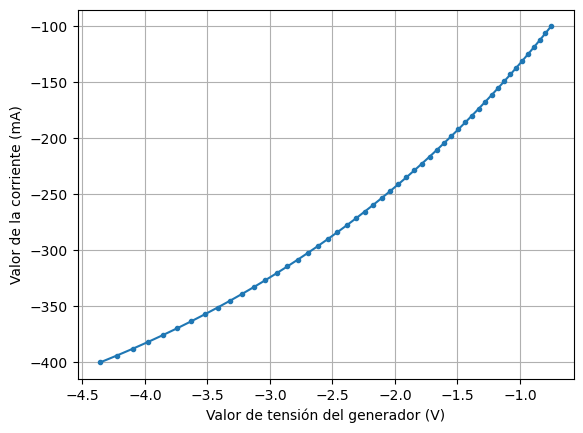

In [41]:
corri_values = np.linspace(-400,-100,50)
volt_values = ((np.log((corri_values-C)/A)/B)-b)/a # Voltaje de alimentación del generador
print(list(volt_values))
plt.plot(volt_values,corri_values,".-")
plt.ylabel("Valor de la corriente (mA)")
plt.xlabel("Valor de tensión del generador (V)")
plt.grid()
plt.show()

## Diferencia de R²

In [34]:
# Hay que modificarlo pero es usable
residuos_cuad = corr_values[:-2] - cuad(offs_true_values[:-2], A, B, C)
ss_res = np.sum(residuos_cuad**2)
ss_tot = np.sum((corr_values[:-2] -np.mean(corr_values[:-2]))**2)
r_2_cuad = 1 - (ss_res / ss_tot)
print(f"El r² cuadrado del ajuste cuadrático es es {r_2_cuad}")
residuos_exp = corr_values[:-2] - exp(offs_true_values[:-2], A, B, C)
ss_res = np.sum(residuos_exp**2)
ss_tot = np.sum((corr_values[:-2] -np.mean(corr_values[:-2]))**2)
r_2_exp = 1 - (ss_res / ss_tot)
print(f"El r² cuadrado del ajuste exponencial es {r_2_exp}")
print(f"La diferencia entre r² es {r_2_exp-r_2_cuad}")

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

# Barrido en amplitud

In [103]:
volt = amp_values[-1]

condicion_maximo_1 = np.where(dic[volt]["V_1"]> np.mean(dic[volt]["V_1"]))
lista_maximos_1 = dic[volt]["V_1"][condicion_maximo_1]
tiempos_maximos_1 = dic[volt]["t_1"][condicion_maximo_1]

condicion_maximo_2 = np.where(dic[volt]["V_2"] > np.mean(dic[volt]["V_2"]))
lista_maximos_2 = dic[volt]["V_2"][condicion_maximo_2]
tiempos_maximos_2 = dic[volt]["t_2"][condicion_maximo_2]


condicion_minimo_2 = np.where(dic[volt]["V_2"] < np.mean(dic[volt]["V_2"]))
lista_minimos_2 = dic[volt]["V_2"][condicion_minimo_2]
tiempos_minimos_2 = dic[volt]["t_2"][condicion_minimo_2]

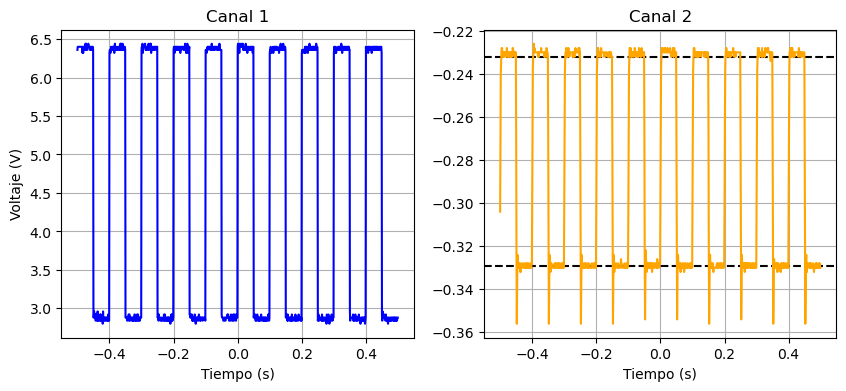

In [104]:
t_1, v_1 = dic[volt]["t_1"], dic[volt]["V_1"]
t_2, v_2 = dic[volt]["t_2"], dic[volt]["V_2"]


fig, axs = plt.subplots(ncols = 2, figsize = (10,4))
axs[1].axhline(np.mean(lista_maximos_2), ls = "--", c = "k")
axs[1].axhline(np.mean(lista_minimos_2), ls = "--", c = "k")

axs[0].plot(t_1,v_1, color = "b")
axs[0].set_xlabel("Tiempo (s)")
axs[1].plot(t_2,v_2, color = "orange")
axs[1].set_xlabel("Tiempo (s)")
axs[0].set_ylabel("Voltaje (V)")
axs[0].set_title("Canal 1")
axs[0].grid()
axs[1].set_title("Canal 2")
axs[1].grid()

plt.show()


In [111]:
lista_amp_alim = []
lista_amp_corr = []

for amp in amp_values:
    
    # Calculamos la amplitud de la cuadrada con la que alimentamos
    condicion_maximo_1 = np.where(dic[amp]["V_1"]> np.mean(dic[amp]["V_1"]))
    lista_maximos_1 = dic[amp]["V_1"][condicion_maximo_1]
    tiempos_maximos_1 = dic[amp]["t_1"][condicion_maximo_1]
    
    condicion_minimo_1 = np.where(dic[amp]["V_1"] < np.mean(dic[amp]["V_1"]))
    lista_minimos_1 = dic[amp]["V_1"][condicion_minimo_1]
    tiempos_minimos_1 = dic[amp]["t_1"][condicion_minimo_1]
    
    # Calculamos la amplitud del generador de corriente
    condicion_maximo_2 = np.where(dic[amp]["V_2"] > np.mean(dic[amp]["V_2"]))
    lista_maximos_2 = dic[amp]["V_2"][condicion_maximo_2]
    tiempos_maximos_2 = dic[amp]["t_2"][condicion_maximo_2]

    condicion_minimo_2 = np.where(dic[amp]["V_2"] < np.mean(dic[amp]["V_2"]))
    lista_minimos_2 = dic[amp]["V_2"][condicion_minimo_2]
    tiempos_minimos_2 = dic[amp]["t_2"][condicion_minimo_2]
    
    amp_alim = np.mean(lista_maximos_1)-np.mean(lista_minimos_1)
    amp_corr = np.mean(lista_maximos_2)-np.mean(lista_minimos_2)
    
    lista_amp_alim.append(amp_alim) 
    lista_amp_corr.append(amp_corr*1000) # Lo pasamos a mA
    

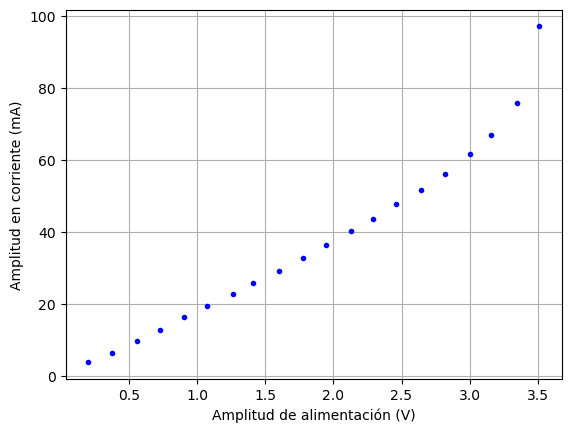

In [114]:
plt.plot(lista_amp_alim[:],lista_amp_corr[:],".", c = "b")
plt.xlabel("Amplitud de alimentación (V)")
plt.ylabel("Amplitud en corriente (mA)")
plt.grid()
plt.show()

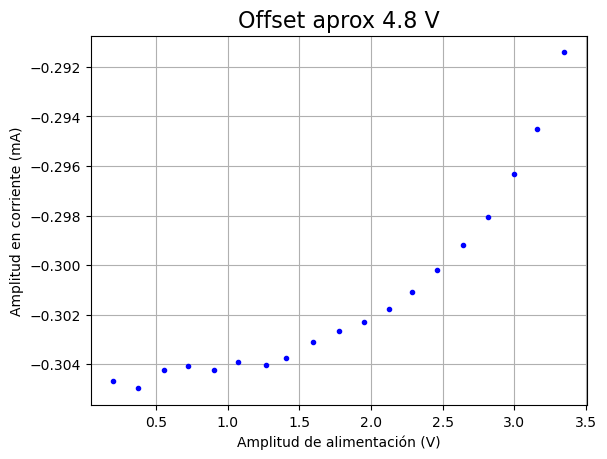

In [121]:
lista_corr_med = [np.mean(dic[amp]["V_2"]) for amp in amp_values]

plt.plot(lista_amp_alim[:-1],lista_corr_med[:-1],".", c = "b")
plt.title("Offset aprox 4.8 V", fontsize = 16)
plt.xlabel("Amplitud de alimentación (V)")
plt.ylabel("Amplitud en corriente (mA)")
plt.grid()
plt.show()

In [73]:
# Cargamos los datos
with open(f"../mediciones/Barrido en amplitud a 2.4 V de offset.pickle", "rb") as f:
    dic = pickle.load(f)

In [75]:
# Hago una lista con los valores de offset que alimentamos con el generador de funciones
amp_values = list(dic.keys())
print(offs_values)
# Valores de corriente en mA
corr_values = [np.mean(dic[amp]["V_2"])*1000 for amp in amp_values]
print(corr_values)

['-1.0V', '-0.9V', '-0.8V', '-0.7000000000000001V', '-0.6000000000000001V', '-0.5000000000000001V', '-0.40000000000000013V', '-0.30000000000000016V', '-0.20000000000000018V', '-0.1000000000000002V', '-2.220446049250313e-16V', '0.09999999999999964V', '0.19999999999999973V', '0.2999999999999998V', '0.3999999999999997V', '0.49999999999999956V', '0.5999999999999996V', '0.6999999999999997V', '0.7999999999999996V', '0.8999999999999995V', '0.9999999999999996V', '1.0999999999999996V', '1.1999999999999993V', '1.2999999999999994V', '1.3999999999999995V', '1.4999999999999996V', '1.5999999999999996V', '1.6999999999999993V', '1.7999999999999994V', '1.8999999999999995V', '1.9999999999999991V', '2.099999999999999V', '2.1999999999999993V', '2.2999999999999994V', '2.3999999999999995V', '2.499999999999999V', '2.599999999999999V', '2.6999999999999993V', '2.799999999999999V', '2.899999999999999V']
[-304.66999999999996, -304.97599999999994, -304.214, -304.054, -304.24, -303.916, -304.03599999999994, -303.7

In [76]:
amp_values_new = []
for amp in amp_values:
    new_amp = amp[:-1]
    amp_values_new.append(float(new_amp))

print("Valores del generador", amp_values_new)

Valores del generador [0.1, 0.1842105263157895, 0.26842105263157895, 0.3526315789473684, 0.4368421052631579, 0.5210526315789473, 0.6052631578947368, 0.6894736842105262, 0.7736842105263158, 0.8578947368421053, 0.9421052631578947, 1.0263157894736843, 1.1105263157894738, 1.1947368421052633, 1.2789473684210526, 1.3631578947368421, 1.4473684210526316, 1.5315789473684212, 1.6157894736842107, 1.7]


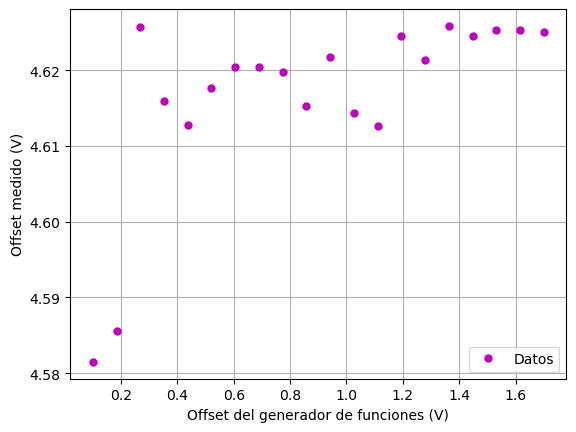

In [77]:
plt.plot(amp_values_new, amp_true_values, ".m",ms = 10, label = "Datos")
#plt.plot(amp_values_new, lineal(np.array(offs_values_new),a,b), "--k", label = "Ajuste")
plt.xlabel("Offset del generador de funciones (V)")
plt.ylabel("Offset medido (V)")
plt.legend()
plt.grid()
plt.show()